# TP3 - exercice 4 : optimisation d'une SVM linéaire dans l'espace primal ou dual.

Dans cet exercice nous verrons comment apprendre un modèle SVM pour la classification dans l'espace dual ou l'espace primal, à partir des classe [**SVC**](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) et [**LinearSVC**](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

Pour cela nous travaillerons sur le jeu de données **MNIST** que l'on peut générer à partir de la fonction [fetch_mldata](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_mldata.html) du module **datasets** de scikit-learn. 
Comme le jeu **digits**, ce jeu de données contient des imagettes de caractères manuscrits (des chiffres entre 0 et 1). Il est néanmoins plus conséquent que le jeu **digits** : il contient 60.000 instances d'apprentissage pour 10.000 instances de test, et chaque image est de taille 28x28 (au lieu de 8x8).

Nous illustrerons que l'optimisation dans le primal peut être bien plus efficace quand le nombre d'observations (ici 60.000) dépasse le nombre de descripteurs (ici 784).


## Question 1. Charger le jeu de MNIST et le découper en jeu d'apprentissage et jeu de test avec le code ci-dessous.
* on rappelle que les 60.000 premières instances constituent le jeu d'apprentissage et les 10.000 dernières le jeu de test.
* voir l'exercice 4 du TP2 si besoin.

In [1]:
# generic imports #
#-----------------#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# get data #
#----------#
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
# split in train/test #
#---------------------#
X = mnist.data
y = mnist.target
y = y.astype('int')
X_train, X_test, y_train, y_test = X[:60000,], X[60000:], y[:60000], y[60000:]
# shuffle training set #
#----------------------#
# (otherwise starts will all 0's, 1's, ... - useful for the purpose of this exercice)
ind = np.random.choice(len(y_train), size = len(y_train), replace = False)
X_train = X_train[ind,:]
y_train = y_train[ind]

## Question 2. Nous considérons le problème de reconnaître le $0$ des autres chiffres. Construire un vecteur binaire indiquant si le chiffres d'apprentissage sont des $0$ ou des $1$.

In [3]:
# define a binary classification problem
y_train_0 = np.zeros(y_train.shape)
y_train_0[y_train == 0] = 1

## Question 3. La classe *LinearSVC* du module *svm* permet d'apprendre une SVM dans l'espace primal (par opposition à la classe *SVC* qui travaille dans l'espace dual). Quel est l'intérêt de travailler dans l'espace dual ? Instancier deux modèles avec le code ci-dessous.

In [4]:
# dual 
from sklearn.svm import SVC
svm_dual = SVC(kernel = 'linear', C = 1)
# primal
from sklearn.svm import LinearSVC
svm_primal = LinearSVC(C=1.0, dual=False)

## Question 4. On peut mesurer le temps d'exécution d'une instruction (ou d'un bloc d'instructions) avec le code ci-dessous. Comparer le temps nécessaire à apprendre chacun des deux modèles précécents à partir des *1.000 premières instances* du jeu d'apprentissage. Qu'observez-vous ?
* NB : on considèrera le **problème binaire** construit ci-dessus consistant à reconnaître les 0 des autres caractères.

In [5]:
import time

start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.0


In [6]:
start = time.time()
svm_dual.fit(X_train[:1000,:], y_train_0[:1000])
end = time.time()
print('time taken to fit model in the dual = %f seconds' % (end - start))

start = time.time()
svm_primal.fit(X_train[:1000,:], y_train_0[:1000])
end = time.time()
print('time taken to fit model in the primal = %f seconds' % (end - start))

time taken to fit model in the dual = 0.119300 seconds
time taken to fit model in the primal = 0.015600 seconds


## Question 5. Reproduire cette expérience en faisant croître la taille du jeu d'apprentissage de $1.000$ à $20.000$ par pas de $1.000$, et représenter les résultats sous la forme d'un graphique. 

In [7]:
size_grid = np.arange(1000,20001,1000)
time_dual = np.zeros(len(size_grid))
time_primal = np.zeros(len(size_grid))
for i in range(len(size_grid)) :
    print('*** processing %d instances ***' % size_grid[i] )
    start = time.time()
    svm_dual.fit(X_train[:size_grid[i],:], y_train_0[:size_grid[i]])
    end = time.time()
    #print('time taken to fit model in the dual = %f seconds' % (end - start))
    time_dual[i] = end - start
    start = time.time()
    svm_primal.fit(X_train[:size_grid[i],:], y_train_0[:size_grid[i]])
    end = time.time()
    #print('time taken to fit model in the primal = %f seconds' % (end - start))
    time_primal[i] = end - start

*** processing 1000 instances ***
*** processing 2000 instances ***
*** processing 3000 instances ***
*** processing 4000 instances ***
*** processing 5000 instances ***
*** processing 6000 instances ***
*** processing 7000 instances ***
*** processing 8000 instances ***
*** processing 9000 instances ***
*** processing 10000 instances ***
*** processing 11000 instances ***
*** processing 12000 instances ***
*** processing 13000 instances ***
*** processing 14000 instances ***
*** processing 15000 instances ***
*** processing 16000 instances ***
*** processing 17000 instances ***
*** processing 18000 instances ***
*** processing 19000 instances ***
*** processing 20000 instances ***


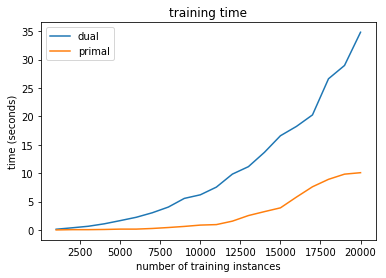

In [8]:
plt.plot(size_grid, time_dual, label = 'dual')
plt.plot(size_grid, time_primal, label = 'primal')
plt.legend()
plt.xlabel('number of training instances')
plt.ylabel('time (seconds)')
plt.title('training time')
plt.show()

## Question 6. Apprendre le modèle sur le jeu de données complet, en travaillant dans le primal. Combien de temps cela prend-il ? Estimer le temps nécessaire pour résoudre le problème initial (i.e., reconnaître les chiffres $0$ à $9$) par une stratégie "One versus Rest", et pour optimiser le paramètre $C$ par validation croisée (de type *GridSearchCV*). 

In [9]:
start = time.time()
svm_primal.fit(X_train, y_train_0)
end = time.time()
print('time taken to fit model in the primal = %f seconds' % (end - start))

time taken to fit model in the primal = 33.955200 seconds


## Question 7 - pour aller plus loin. Optimiser le paramètre $C$ de la SVM linéaire par validation croisée en utilisant la classe *GridSearchCV*. Evaluer les performances sur le jeu de test, et représenter les poids du modèle pour tenter d'interpréter le modèle. Comparer avec les résultats obtenus par les forêts aléatoires dans l'exercice 4 du TP2. 

In [10]:
from sklearn.model_selection import GridSearchCV
svm = LinearSVC()
param_grid = {'C':[0.01,0.1,1,10,100]}
grid_search = GridSearchCV(svm, param_grid, cv = 5)
grid_search.fit(X_train, y_train_0)
print("The best parameters are %s with a score of %0.2f"
     % (grid_search.best_params_, grid_search.best_score_))

The best parameters are {'C': 100} with a score of 0.99


In [11]:
# evaluate model
y_pred = grid_search.best_estimator_.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[  60  920    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1017   15    0    0    0    0    0    0    0    0]
 [1003    7    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 885    7    0    0    0    0    0    0    0    0]
 [ 952    6    0    0    0    0    0    0    0    0]
 [1026    2    0    0    0    0    0    0    0    0]
 [ 971    3    0    0    0    0    0    0    0    0]
 [1004    5    0    0    0    0    0    0    0    0]]


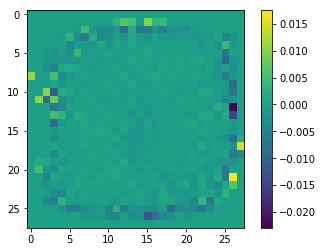

In [12]:
# show variable importance
tt = np.reshape(grid_search.best_estimator_.coef_, (28,28))
plt.imshow(tt)
plt.colorbar()
plt.show()